In [1]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json
import datetime
import numpy as np
from matplotlib.dates import DateFormatter
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as mtick

# sns.set_style("white")


from plot import *

sns.set_style('whitegrid')
InitMatplotlib(7, 7)

colors = sns.color_palette('colorblind')
%matplotlib inline

use_tex True 
font_size 7 
title_size 7


In [2]:
import pandas as pd

# read csv
df = pd.read_csv('/home/gcpuser/.sky/catalogs/v5/gcp/vms.csv')

# add one column: the ratio of price to spot price
df = df.assign(Ratio=df['Price'] / df['SpotPrice'])

# filter out US regions
# df = df[df['Region'].str.contains('us-east-1')]

print(len(df))
df = df[df['Price'] / df['SpotPrice'] > 2.5]
df = df[df['Price'] > 0.5]

print(len(df))
print(df)

14399
8850
        InstanceType  vCPUs  MemoryGiB AcceleratorName  AcceleratorCount  \
4      a2-highgpu-1g   12.0       85.0             NaN               NaN   
5      a2-highgpu-1g   12.0       85.0             NaN               NaN   
8      a2-highgpu-1g   12.0       85.0             NaN               NaN   
9      a2-highgpu-1g   12.0       85.0             NaN               NaN   
10     a2-highgpu-1g   12.0       85.0             NaN               NaN   
...              ...    ...        ...             ...               ...   
14393            NaN    NaN        NaN     tpu-v4-3712               1.0   
14394            NaN    NaN        NaN     tpu-v4-3840               1.0   
14395            NaN    NaN        NaN     tpu-v4-3840               1.0   
14396            NaN    NaN        NaN     tpu-v4-3968               1.0   
14397            NaN    NaN        NaN     tpu-v4-3968               1.0   

           GpuInfo           Region   AvailabilityZone       Price  \
4     

In [3]:
FILE_NAME = '../availability/avail-stats-aws-2023-04-18T21:02:22.json' # east-1
# FILE_NAME = 'availability/avail-stats-aws-2023-04-18T21:16:33.json'

import json
ins_cnt = {}
ins_zone = set()
total_time = 0
for i, line in enumerate(open(FILE_NAME, 'r')):
    js = json.loads(line)
    ins_list = js['instances']
    for ins in ins_list:
        ins_zone.add((ins['ins_type'], ins['zone']))
    total_time += 1
print('total time', total_time)

print(len(ins_zone))
total_cnt = 0
uni_type = set()

all_ins = []
for ins_type, zone in ins_zone:
    avail_list = []
    for i, line in enumerate(open(FILE_NAME, 'r')):
        js = json.loads(line)
        ins_list = js['instances']
        for ins in ins_list:
            if (ins_type, zone) == (ins['ins_type'], ins['zone']):
                avail_list.append(len(ins['ins_ids']))
                break
                # print((ins_type, zone), ins['ins_ids'], i)
    up_time = sum(avail_list)
    uni_type.add(ins_type)
    my_dict = {}
    my_dict['ins_type'] = ins_type
    my_dict['zone'] = zone
    my_dict['ratio'] = up_time / total_time
    my_dict['last_5'] = avail_list[-5:]
    # if up_time / total_time < 0.85:
    #     print(my_dict['ins_type'], my_dict['zone'], my_dict['ratio'])
    # print(avail_list)
    all_ins.append(my_dict)
        # print((ins_type, zone), up_time / total_time)
    # print('===')
df = pd.DataFrame(all_ins)
print(len(df[ df['ratio'] <0.9 ]))
print(len(uni_type), uni_type)

FileNotFoundError: [Errno 2] No such file or directory: '../availability/avail-stats-aws-2023-04-18T21:02:22.json'

In [4]:

# FILENAME = 'availability/avail-stats-aws-2023-04-21T01:06:05.json' # search

# FILENAME = 'availability/avail-stats-aws-2023-04-18T21:16:33.json' # west-2
# FILENAME = 'availability/real-stats-aws-2023-04-19T14:33:59.json'  # cpus
# FILENAME = 'availability/avail-stats-aws-2023-04-22T01:01:58.json' # V100
# FILENAME = 'availability/avail-stats-aws-2023-04-26T00:29:18.json' # cpus new
FILENAME = '../../data/real/real_preemption/gcp-2023-04-30/raw/real-gcp-2023-04-30T15:24:04.json' # c3

import json
ins_dict = {}
total_time = 0
for line in open(FILENAME, 'r'):
    total_time += 1
    js = json.loads(line)
    for ins in js['instances']:
        if (ins['ins_type'], ins['zone']) not in ins_dict:
            ins_dict[(ins['ins_type'], ins['zone'])] = []
        ins_dict[(ins['ins_type'], ins['zone'])].append(len(ins['ins_ids']))

def get_spot_life(avail_list):
    # return a list of spot durations, where each duration is the number of consecutive 1s
    ret = []
    st = 0
    while True:
        # find the first 1
        for i in range(st, len(avail_list)):
            if avail_list[i] == 1:
                st = i
                break
        
        if i == len(avail_list)-1:
            break

        for i in range(st, len(avail_list)):
            if avail_list[i] == 0:
                break
        ret.append(i - st)
        st = i
    return ret

for k, v in ins_dict.items():
    # print(k, sum(v) / total_time, v)
    print(k, sum(v) / total_time)
    spot_life = get_spot_life(v)
    print(spot_life)

('c2-standard-60', 'us-central1-a') 0.9990869247626004
[2800, 2670]
('c2-standard-60', 'us-east1-b') 0.9989043097151206
[2447, 3022]
('c3-highcpu-88', 'us-central1-a') 0.99981738495252
[5474]
('c3-highcpu-88', 'us-central1-b') 0.99981738495252
[5474]
('c3-highcpu-88', 'us-central1-c') 0.99981738495252
[5474]
('c3-highcpu-88', 'us-east1-b') 0.954346238130022
[89, 1928, 782, 2426]
('c3-highcpu-176', 'us-central1-c') 0.9996347699050402
[5473]
('c3-highcpu-176', 'us-central1-a') 0.995799853907962
[2682, 3, 109, 2, 2656]
('c3-highcpu-176', 'us-central1-b') 0.991599707815924
[27, 6, 2919, 108, 111, 2258]
('c3-highcpu-176', 'us-east1-b') 0.9002921840759679
[4929]


In [5]:
datapath = '../../data/real/ping_based/us-west-2a_v100_1.json'
# datapath = '../scripts/availability/zh-data/real/ping_based/us-west-2b_v100_1.json'

datalist = ['us-west-2a_k80_1.json', 'us-west-2a_v100_1.json', 'us-west-2b_v100_1.json',
            'us-west-2b_k80_8.json', 'us-west-2a_k80_8.json', 'us-west-2b_v100_8.json',
            'us-west-2a_v100_8.json', 'us-west-2b_k80_1.json']

def get_spot_effprice(avail_list, overhead, spot_unit=6):
    spot_life = get_spot_life(avail_list)

    if len(spot_life) == 0:
        return None
    # print(spot_life)
    total_d = overhead*len(spot_life)

    if sum(spot_life)/spot_unit - total_d <= 0:
        return None

    eff_price = sum(spot_life)/spot_unit/(sum(spot_life)/spot_unit - total_d)

    return eff_price

def plot_effprice(datapath, ax, overhead, window_size, spot_unit=6, ratio=1, color='lightcoral'):
    js = json.load(open(datapath, 'r'))
    print(type(js['data']))
    data = js['data'][:int(len(js['data'])*ratio)]
    avail_list = [1-x for x in data]
    print(len(avail_list))
    # print(sum(avail_list)/len(avail_list))

    effprice_list = [np.nan] * window_size
    for i in range(0, len(avail_list)-window_size):
        price_now = get_spot_effprice(avail_list[i:i+window_size], overhead, spot_unit=spot_unit)
        if price_now != None:
            effprice_list.append(price_now/3)
        else:
            effprice_list.append(np.nan)
    print(len(effprice_list))

    # spot frac to 2 decimal places
    spot_frac = round(sum(avail_list)/len(avail_list), 2)
    # ax.set_title(datapath.split('/')[-1].split('.')[0] + f' (spot fraction={spot_frac})')

    cur_time = [x/spot_unit for x in range(len(effprice_list))]
    # turn cur_time (in hour) to datetime
    init_date_time = datetime.datetime(2023, 2, 15, 22, 0, 0)
    cur_time = [init_date_time + datetime.timedelta(hours=x) for x in cur_time]
    df = pd.DataFrame({'time': cur_time, 'price': effprice_list})

    # sns.lineplot(x='time', y='price', data=df, label=datapath.split('/')[-1].split('.')[0], ax=ax)
    ax.plot(cur_time, effprice_list, label=datapath.split('/')[-1].split('.')[0], color=color)

def plot_effcost(datapath, ax, overhead, window_size, spot_unit=6, ratio=1, color='lightcoral'):
    js = json.load(open(datapath, 'r'))
    print(type(js['data']))
    data = js['data'][:int(len(js['data'])*ratio)]
    avail_list = [1-x for x in data]
    print(len(avail_list))
    # print(sum(avail_list)/len(avail_list))

    cost_list = [np.nan] * window_size
    for i in range(0, len(avail_list)-window_size):

        spot_life = get_spot_life(avail_list[i:i+window_size])

        total_cost = 0
        total_cost += (sum(spot_life) * 1/3 + (window_size - sum(spot_life)) * 1)/spot_unit

        overhead_cnt = 0
        overhead_cnt += len(spot_life) * 2
        if avail_list[i] == 1:
            overhead_cnt -= 1
        if avail_list[i+window_size-1] == 1:
            overhead_cnt -= 1
        total_cost += overhead_cnt * overhead

        total_cost /= (window_size/spot_unit)
        cost_list.append(total_cost)
        # price_now = get_spot_effprice(avail_list[i:i+window_size], overhead, spot_unit=spot_unit)
        # if price_now != None:
        #     effprice_list.append(price_now/3)
        # else:
        #     effprice_list.append(np.nan)
    print(len(cost_list))
    print(cost_list)

    # spot frac to 2 decimal places
    spot_frac = round(sum(avail_list)/len(avail_list), 2)
    # ax.set_title(datapath.split('/')[-1].split('.')[0] + f' (spot fraction={spot_frac})')

    cur_time = [x/spot_unit for x in range(len(cost_list))]
    # turn cur_time (in hour) to datetime
    init_date_time = datetime.datetime(2023, 2, 15, 22, 0, 0)
    cur_time = [init_date_time + datetime.timedelta(hours=x) for x in cur_time]
    df = pd.DataFrame({'time': cur_time, 'price': cost_list})

    # sns.lineplot(x='time', y='price', data=df, label=datapath.split('/')[-1].split('.')[0], ax=ax)
    ax.plot(cur_time, cost_list, label=datapath.split('/')[-1].split('.')[0], color=color)

def plot_avail(datapath, ax, spot_unit=6, ratio=1, center=1, color='lightcoral', verlen=0.05):
    js = json.load(open(datapath, 'r'))
    data = js['data'][:int(len(js['data'])*ratio)]
    avail_list = [1-x for x in data]
    # print(sum(avail_list)/len(avail_list))

    cur_time = [x/spot_unit for x in range(len(avail_list))]
    # turn cur_time (in hour) to datetime
    init_date_time = datetime.datetime(2023, 2, 15, 22, 0, 0)
    cur_time = [init_date_time + datetime.timedelta(hours=x) for x in cur_time]
    df = pd.DataFrame({'time': cur_time, 'avail': avail_list})

    # sns.lineplot(x='time', y='avail', data=df, label=datapath.split('/')[-1].split('.')[0], ax=ax)

    # Add a new column 'group' to store the group number for each continuous segment
    df['group'] = (df['avail'] == 0).cumsum()

    # Filter out rows with no availability
    available_df = df[df['avail'] == 1]

    # Get the unique group numbers
    groups = available_df['group'].unique()

    ymax = center+verlen
    ymin = center-verlen
    for i, group in enumerate(groups):
        group_data = available_df[available_df['group'] == group]
        group_data['avail'] = group_data['avail'].replace(1, center)

        # Add short vertical lines at the beginning and end of each segment
        start_time = group_data['time'].min()
        end_time = group_data['time'].max()

        # ax.vlines(x=start_time, ymin=ymin, ymax=ymax, colors='blue')
        if i != len(groups)-1:
            ax.vlines(x=end_time, ymin=ymin, ymax=ymax, linewidth=0.5, color=color)

        #sns.lineplot(x='time', y='avail', data=group_data, ax=ax, color='blue', linewidth=2)
        ax.plot(group_data['time'],
                group_data['avail'],
                linestyle='-',
                color=color,
                linewidth=1,
                solid_capstyle='butt')



# overhead = 0.2
# window_size = 50
# # generate plots, 2 per row, 4 rows
# fig, axes = plt.subplots(4, 2, figsize=(8, 16), constrained_layout=True)
# for i, data in enumerate(datalist):
#     print(data)
#     datapath = '../scripts/availability/zh-data/real/ping_based_complete/' + data
#     axe_idx = (i//2, i%2)
#     plot_effprice(datapath, axes[axe_idx], overhead=overhead, window_size=window_size)

# # compact
# fig.suptitle(f'Effective Price (window size = {round(window_size/6, 2)}h, overhead = {overhead}h)', fontsize=16)
# fig.show()

us-west-2b_v100_1.json
<class 'list'>
7055
7055
<class 'list'>
7055
7055


/tmp/ipykernel_29773/156751125.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['avail'] = group_data['avail'].replace(1, center)


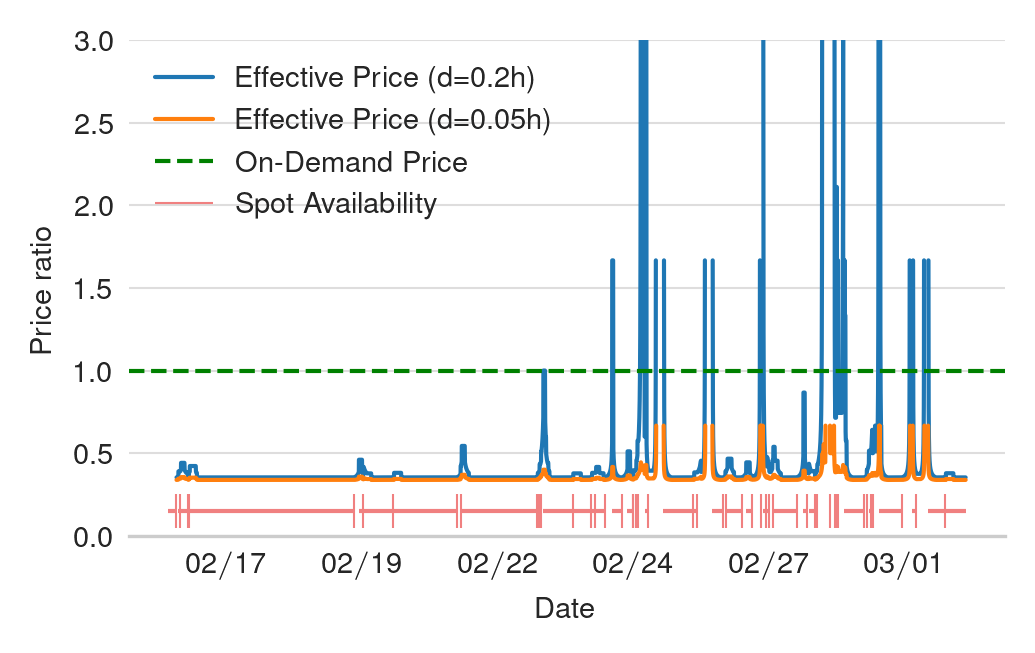

In [6]:
datalist = ['us-west-2b_v100_1.json']

window_size = 72
overhead = 0.2
spot_unit = 20
ratio = 0.35

colors = ['#1f77b4', '#ff7f0e', '#2ca02c',
          '#d62728', '#9467bd', '#8c564b',
          '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
# generate plots, 2 per row, 4 rows
# fig, axes = plt.subplots(1, 1, figsize=(8, 4), constrained_layout=True)
fig, axes = plt.subplots(1, 1, figsize=(fig_width, fig_height), constrained_layout=True, dpi=300)

for i, data in enumerate(datalist):
    
    print(data)
    datapath = '../../data/real/availability/2023-02-15/parsed/' + data
    # axe_idx = i%2
    plot_effprice(datapath, axes, overhead=0.2, window_size=window_size, spot_unit=20, ratio=ratio, color=colors[0])
    plot_effprice(datapath, axes, overhead=0.05, window_size=window_size, spot_unit=20, ratio=ratio, color=colors[1])
    # plot a horizontal line at y=1 with legend
    axes.axhline(y=1, color='green', linestyle='--', linewidth=1)
    # axes.axhline(y=1, color='green', linestyle='--', linewidth=1)
    
    plot_avail(datapath, axes, ratio=ratio, spot_unit=20, center=0.15, verlen=0.1)

    
    axes.legend(['Effective Price (d=0.2h)', 'Effective Price (d=0.05h)', 'On-Demand Price', 'Spot Availability'])
    
    # ax.plot(df['time'], df['price'], marker='o', linestyle='-', linewidth=2)
    axes.set_xlabel('Date')
    axes.set_ylabel('Price ratio')
    
    axes.set_ylim(0, 3)
    # ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    
# Format x-axis labels to show only month and day
date_format = DateFormatter("%m/%d")
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=7))

# compact
# fig.suptitle(f'Spot Price')
# fig.suptitle(f'Effective Price (window size = {round(window_size/spot_unit, 2)}h, overhead = {overhead}h)', fontsize=16)
fig.show()
# save as pdf
fig.savefig('effective_v100_price.pdf', bbox_inches='tight')

us-west-2b_v100_1.json
<class 'list'>
7055
7055
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, n

/tmp/ipykernel_29773/156751125.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['avail'] = group_data['avail'].replace(1, center)


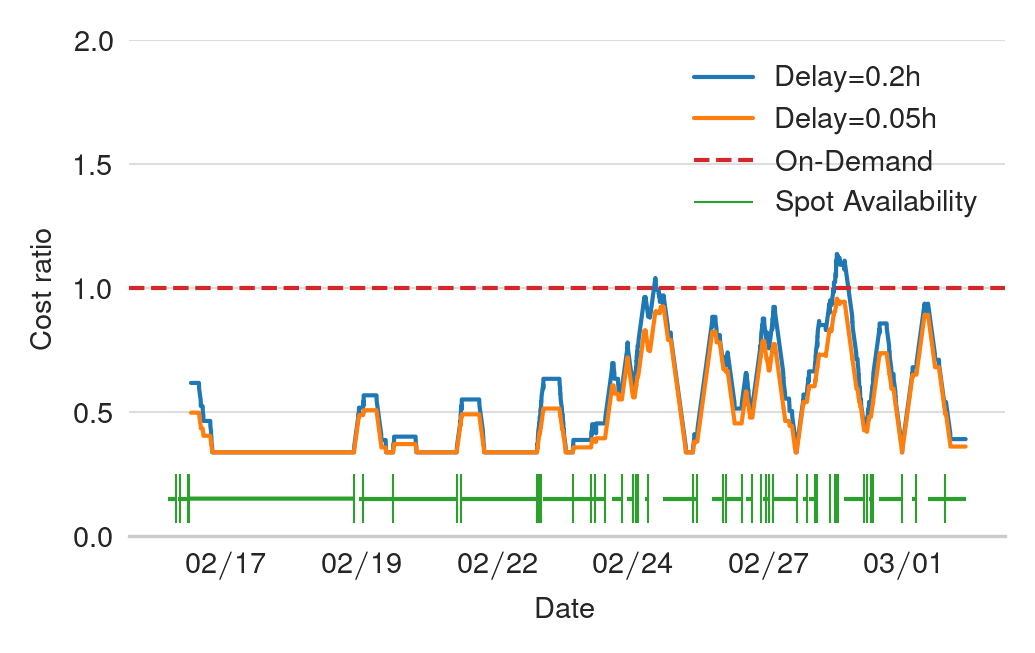

In [7]:
datalist = ['us-west-2b_v100_1.json']

window_size = 200
overhead = 0.2
spot_unit = 20
ratio = 0.35

colors = ['#1f77b4', '#ff7f0e', '#2ca02c',
          '#d62728', '#9467bd', '#8c564b',
          '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
# generate plots, 2 per row, 4 rows
# fig, axes = plt.subplots(1, 1, figsize=(8, 4), constrained_layout=True)
fig, axes = plt.subplots(1, 1, figsize=(fig_width, fig_height), constrained_layout=True, dpi=300)

for i, data in enumerate(datalist):
    
    print(data)
    datapath = '../../data/real/availability/2023-02-15/parsed/' + data
    # axe_idx = i%2
    plot_effcost(datapath, axes, overhead=0.2, window_size=window_size, spot_unit=20, ratio=ratio, color=colors[0])
    plot_effcost(datapath, axes, overhead=0.05, window_size=window_size, spot_unit=20, ratio=ratio, color=colors[1])
    # plot a horizontal line at y=1 with legend
    axes.axhline(y=1, color=colors[3], linestyle='--', linewidth=1)
    # axes.axhline(y=1, color='green', linestyle='--', linewidth=1)
    
    plot_avail(datapath, axes, ratio=ratio, spot_unit=20, center=0.15, verlen=0.1, color=colors[2])

    
    axes.legend(['Delay=0.2h', 'Delay=0.05h', 'On-Demand', 'Spot Availability'])
    
    # ax.plot(df['time'], df['price'], marker='o', linestyle='-', linewidth=2)
    axes.set_xlabel('Date')
    axes.set_ylabel('Cost ratio')
    
    axes.set_ylim(0, 2)
    # ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    
# Format x-axis labels to show only month and day
date_format = DateFormatter("%m/%d")
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=7))
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=4))


# compact
# fig.suptitle(f'Spot Price')
# fig.suptitle(f'Effective Price (window size = {round(window_size/spot_unit, 2)}h, overhead = {overhead}h)', fontsize=16)
fig.show()
# save as pdf
fig.savefig('effective_cost_v100.pdf', bbox_inches='tight')

us-west-2a_v100_1.json


/tmp/ipykernel_29773/156751125.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['avail'] = group_data['avail'].replace(1, center)


us-west-2b_v100_1.json
us-west-2c_v100_1.json


/tmp/ipykernel_29773/156751125.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['avail'] = group_data['avail'].replace(1, center)
/tmp/ipykernel_29773/156751125.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['avail'] = group_data['avail'].replace(1, center)


us-east-1a_v100_1.json
us-east-1c_v100_1.json


/tmp/ipykernel_29773/156751125.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['avail'] = group_data['avail'].replace(1, center)
/tmp/ipykernel_29773/156751125.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['avail'] = group_data['avail'].replace(1, center)


us-east-1d_v100_1.json


/tmp/ipykernel_29773/156751125.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['avail'] = group_data['avail'].replace(1, center)


us-east-1f_v100_1.json


/tmp/ipykernel_29773/156751125.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['avail'] = group_data['avail'].replace(1, center)


us-east-2a_v100_1.json
us-east-2b_v100_1.json


/tmp/ipykernel_29773/156751125.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['avail'] = group_data['avail'].replace(1, center)
/tmp/ipykernel_29773/156751125.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['avail'] = group_data['avail'].replace(1, center)


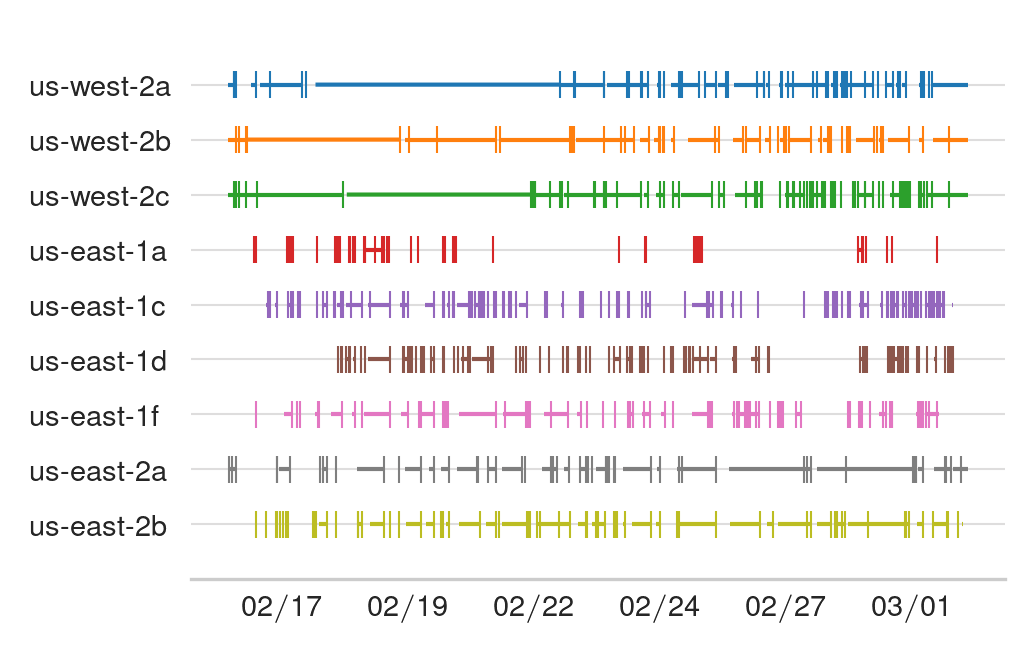

In [8]:


# datalist = ['us-west-2a_v100_1.json']
# datalist = ['us-east-1a_v100_1.json']

datalist = ['us-west-2a_v100_1.json',
            'us-west-2b_v100_1.json',
            'us-west-2c_v100_1.json',
            'us-east-1a_v100_1.json',
            'us-east-1c_v100_1.json',
            'us-east-1d_v100_1.json',
            'us-east-1f_v100_1.json',
            'us-east-2a_v100_1.json',
            'us-east-2b_v100_1.json',]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c',
          '#d62728', '#9467bd', '#8c564b',
          '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# datalist = ['us-east-1c_v100_1.json',
#             'us-east-1d_v100_1.json',
#             'us-west-2b_v100_1.json',
#             'us-west-2c_v100_1.json',]

overhead = 0.2
window_size = 50
# generate plots, 2 per row, 4 rows

fig, axes = plt.subplots(1, 1, figsize=(fig_width, fig_height), constrained_layout=True, dpi=300)
# fig = plt.figure(figsize=(fig_width, fig_height), dpi=300)

for i, data in enumerate(datalist):
    print(data)
    
    axes.set_ylim(0, 2)
    datapath = '../../data/real/availability/2023-02-15/parsed/' + data
    plot_avail(datapath, axes, ratio=0.35, spot_unit=20, color=colors[i], center=1.8-0.2*i)

label_names = [data.split('_')[0] for data in datalist[::-1]]
y_pos = np.arange(0.2, 0.2*(len(datalist)+1), 0.2)
# axes.set_yticks(y_pos, labels=label_names, horizontalalignment='left', position=(-0.15,0))
axes.set_yticks(y_pos, labels=label_names, horizontalalignment='left', position=(-0.18,0))

# Format x-axis labels to show only month and day
date_format = DateFormatter("%m/%d")
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=7))

# compact)
#fig.suptitle(f'Spot availability over two weeks')
fig.show()
fig.savefig('spot_avail.pdf', bbox_inches='tight')

7        0.918
16       0.918
25       0.918
34       0.918
43       0.918
         ...  
58741    0.918
58750    0.918
58759    0.918
58768    0.918
58777    0.918
Name: price, Length: 6531, dtype: float64
7055


/opt/conda/envs/sky-spot/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/envs/sky-spot/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


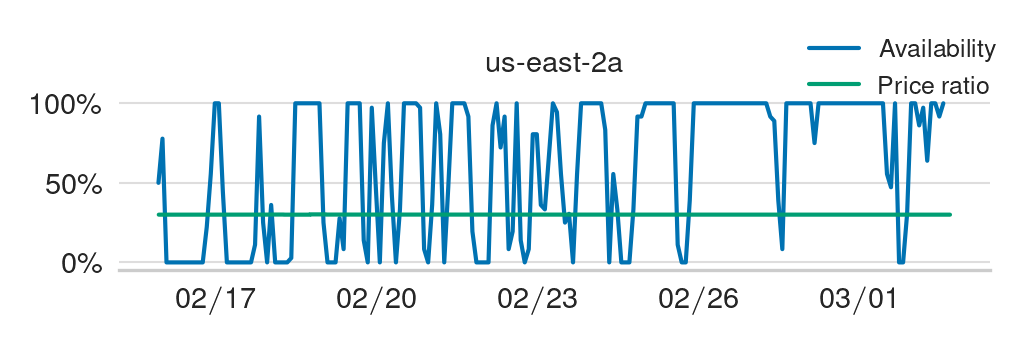

In [9]:


# datalist = ['us-west-2a_v100_1.json']
# datalist = ['us-east-1a_v100_1.json']

raw_file = '../../data/real/availability/2023-02-15/raw/stats-p3.2xlarge-1-2023-02-15T22:05:16.json'
price_list = []

zones = set()
for line in open(raw_file, 'r'):
    js = json.loads(line)
    for zone, v in js.items():
        if zone == 'date':
            continue
        zones.add(zone)
        price_list.append({'zone': zone, 'price': v['price'], 'date': js['date']})
        
df_all = pd.DataFrame(price_list)
df_all['price'] = df_all['price'].astype(float)
df_all['date'] = pd.to_datetime(df_all['date'])

datalist = ['us-west-2a_v100_1.json',
            'us-west-2b_v100_1.json',
            'us-west-2c_v100_1.json',
            'us-east-1a_v100_1.json',
            'us-east-1c_v100_1.json',
            'us-east-1d_v100_1.json',
            'us-east-1f_v100_1.json',
            'us-east-2a_v100_1.json',
            'us-east-2b_v100_1.json',]

# datalist = ['us-west-2b_v100_1.json', 'us-east-2a_v100_1.json']
datalist = ['us-east-2a_v100_1.json']

colors = ['#1f77b4', '#ff7f0e', '#2ca02c',
          '#d62728', '#9467bd', '#8c564b',
          '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

spot_unit = 20

def get_avail(datapath, ratio=1):
    js = json.load(open(datapath, 'r'))
    data = js['data'][:int(len(js['data'])*ratio)]
    avail_list = [1-x for x in data]
    return avail_list


# def plot_ccdf(spot_life):
window_size = 36
ratio=0.35
end_date = datetime.datetime(2023, 3, 2, 16, 0, 0)
# ratio=1

# fig = plt.figure(figsize=(fig_width, fig_height), dpi=200)

#fig, axes = plt.subplots(1, len(datalist), figsize=(fig_width, fig_height), constrained_layout=True, dpi=300)
# fig, axes = plt.subplots(2, 1, figsize=(fig_width, fig_height), constrained_layout=True, dpi=300)
fig, axes = plt.subplots(1, 1, figsize=(fig_width, fig_height/2), constrained_layout=True, dpi=300)


for i, data in enumerate(datalist):
    zone_name = data.split('_')[0]
    df_zone = df_all[df_all['zone'] == zone_name]
    # ratio
    df_zone = df_zone[df_zone['date'] < end_date]
    print(df_zone['price'])
    
    spot_life_avg = []
    spot_life_median = []
    spot_avail_rate = []
    # fig = plt.figure(figsize=(fig_width, fig_height), dpi=200)
    datapath = '../../data/real/availability/2023-02-15/parsed/' + data
    avail_list = get_avail(datapath, ratio=ratio)

    init_date_time = datetime.datetime(2023, 2, 15, 22, 0, 0)
    cur_time = []
    print(len(avail_list))
    # moving window
    for j in range(0, len(avail_list), int(window_size)):
        cur_time.append(init_date_time + j * datetime.timedelta(minutes=3))
        avail_list_sub = avail_list[j:j+window_size]    
        spot_life = get_spot_life(avail_list_sub)
        spot_life = [x/spot_unit for x in spot_life]
        if len(spot_life) == 0:
            spot_life_avg.append(0)
        else:
            spot_life_avg.append(sum(spot_life)/len(spot_life))
        spot_life_median.append(np.median(spot_life))
        spot_avail_rate.append(sum(avail_list_sub)/len(avail_list_sub)*100)

    
    df = pd.DataFrame({'time': cur_time, 'spot fraction': spot_avail_rate})
    #axes.plot(group_data['time'], group_data['spot fraction'], linestyle='-', color='b', linewidth=1)
    axes.plot(df['time'], df['spot fraction'], label='Availability')
    
    axes.plot(df_zone['date'], df_zone['price']/3.06*100, label='Price ratio')
    
    
    
    axes.yaxis.set_major_formatter(mtick.PercentFormatter())
    date_format = DateFormatter("%m/%d")
    axes.xaxis.set_major_formatter(date_format)
    axes.xaxis.set_major_locator(MaxNLocator(nbins=6))
    axes.set_title(data.split('_')[0])
    
    # axes[i].legend(fontsize=6)
    axes.legend(bbox_to_anchor=(0.9, 1.45), loc='upper center', fontsize=6)


# plt.title('Spot fraction (12-hour window)')
# date_format = DateFormatter("%m/%d")
# plt.gca().xaxis.set_major_formatter(date_format)
# plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=8))
# fig.show()
fig.savefig('spot_fraction_6h.pdf', bbox_inches='tight', pad_inches=0)


us-west-2a_v100_1.json


/tmp/ipykernel_29773/156751125.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['avail'] = group_data['avail'].replace(1, center)


us-east-1a_v100_1.json
us-east-1d_v100_1.json


/tmp/ipykernel_29773/156751125.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['avail'] = group_data['avail'].replace(1, center)
/tmp/ipykernel_29773/156751125.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['avail'] = group_data['avail'].replace(1, center)


us-east-2b_v100_1.json


/tmp/ipykernel_29773/156751125.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['avail'] = group_data['avail'].replace(1, center)
/tmp/ipykernel_29773/2387802784.py:153: UserWarning: The figure layout has changed to tight
  fig.tight_layout(w_pad=5)


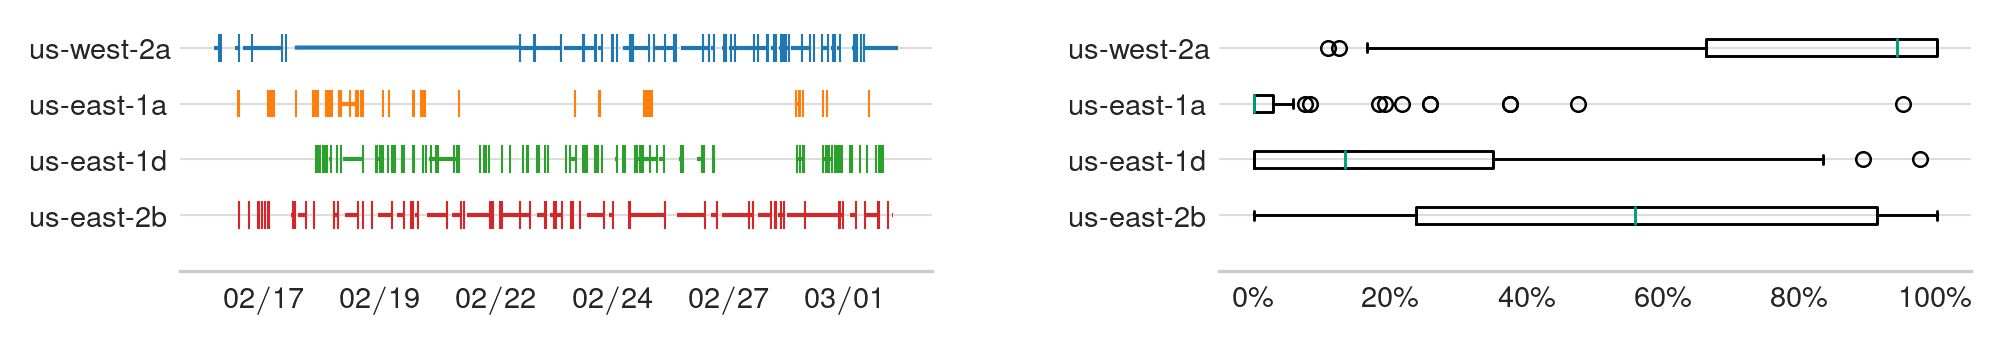

In [17]:




def get_avail(datapath, ratio=1):
    js = json.load(open(datapath, 'r'))
    data = js['data'][:int(len(js['data'])*ratio)]
    avail_list = [1-x for x in data]
    return avail_list


def get_spot_frac(avail_list, window_size):
    ret = []
    for i in range(0, len(avail_list), window_size):
        avail_list_sub = avail_list[i:i+window_size]
        ret.append(sum(avail_list_sub)/window_size*100)
    return ret




# fig = plt.figure(figsize=(fig_width, fig_height), dpi=200)

#fig, axes = plt.subplots(1, len(datalist), figsize=(fig_width, fig_height), constrained_layout=True, dpi=300)
fig, axes = plt.subplots(1, 2, figsize=(fig_width*2, fig_height-.9), constrained_layout=True, dpi=300)




#######################

# datalist = ['us-west-2a_v100_1.json']
# datalist = ['us-east-1a_v100_1.json']

datalist = ['us-west-2a_v100_1.json',
            # 'us-west-2b_v100_1.json',
            # 'us-west-2c_v100_1.json',
            'us-east-1a_v100_1.json',
            # 'us-east-1c_v100_1.json',
            'us-east-1d_v100_1.json',
            # 'us-east-1f_v100_1.json',
            # 'us-east-2a_v100_1.json',
            'us-east-2b_v100_1.json',]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c',
          '#d62728', '#9467bd', '#8c564b',
          '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# datalist = ['us-east-1c_v100_1.json',
#             'us-east-1d_v100_1.json',
#             'us-west-2b_v100_1.json',
#             'us-west-2c_v100_1.json',]

ylim_scale = 1.08
overhead = 0.2
window_size = 50
# generate plots, 2 per row, 4 rows

# fig = plt.figure(figsize=(fig_width, fig_height), dpi=300)
ylim = 0.2 * len(datalist)
axes[0].set_ylim(0, ylim * ylim_scale)
for i, data in enumerate(datalist):
    print(data)
    
    datapath = '../../data/real/availability/2023-02-15/parsed/' + data
    plot_avail(datapath, axes[0], ratio=0.35, spot_unit=20, color=colors[i], center=ylim-0.2*i)

label_names = [data.split('_')[0] for data in datalist[::-1]]
y_pos = np.arange(0.2, 0.2*(len(datalist)), 0.2)
# axes.set_yticks(y_pos, labels=label_names, horizontalalignment='left', position=(-0.15,0))
axes[0].set_yticks(y_pos, labels=label_names, horizontalalignment='left', position=(-0.18,0))

# Format x-axis labels to show only month and day
date_format = DateFormatter("%m/%d")
axes[0].xaxis.set_major_formatter(date_format)
axes[0].xaxis.set_major_locator(MaxNLocator(nbins=7))



###################

# datalist = ['us-west-2a_v100_1.json']
# datalist = ['us-east-1a_v100_1.json']

# datalist = ['us-west-2a_v100_1.json',
#             # 'us-west-2b_v100_1.json',
#             # 'us-west-2c_v100_1.json',
#             # 'us-east-1a_v100_1.json',
#             # 'us-east-1c_v100_1.json',
#             'us-east-1d_v100_1.json',
#             # 'us-east-1f_v100_1.json',
#             # 'us-east-2a_v100_1.json',
#             'us-east-2b_v100_1.json',]
# reverse datalist
datalist = datalist[::-1]

# datalist = ['us-west-2b_v100_1.json', 'us-east-2a_v100_1.json']

colors = ['#1f77b4', '#ff7f0e', '#2ca02c',
          '#d62728', '#9467bd', '#8c564b',
          '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# def plot_ccdf(spot_life):
window_size = 120
# ratio=0.35
spot_unit=20
ratio=0.35


spot_life_all = []

for i, data in enumerate(datalist):
    spot_life_avg = []
    spot_life_median = []
    spot_avail_rate = []
    # fig = plt.figure(figsize=(fig_width, fig_height), dpi=200)
    datapath = '../../data/real/availability/2023-02-15/parsed/' + data
    avail_list = get_avail(datapath, ratio=ratio)
    
    # spot_life = get_spot_life(avail_list)
    # spot_life = [x/spot_unit for x in spot_life]
    # spot_life_all.append(spot_life)
    
    spot_frac = get_spot_frac(avail_list, window_size)
    spot_life_all.append(spot_frac)

    init_date_time = datetime.datetime(2023, 2, 15, 22, 0, 0)
    cur_time = []
    
# bp = axes.boxplot(spot_life_all, vert=False, widths=0.3, flierprops=dict(marker='.', markersize=5), showfliers=False)
bp = axes[1].boxplot(spot_life_all, vert=False, widths=0.3, flierprops=dict(marker='.', markersize=7))
# axes.set_xscale('log', base=2)
# Modify the outlier marker properties
for flier in bp['fliers']:
    flier.set_markeredgewidth(0.6)    # Set outlier marker edge width
    flier.set_markeredgecolor('black')
    #flier.set_markeredgecolor((0.2, 0.2, 0.2))  # Set outlier marker edge color to darker grey (RGB tuple)
linewidth = 0.7  # Set the desired linewidth
for element in ['boxes', 'whiskers', 'medians']:
    for item in bp[element]:
        item.set_linewidth(linewidth)
        
# Modify the linewidth of the caps
for cap in bp['caps']:
    cap.set_linewidth(linewidth)

label_names = [data.split('_')[0] for data in datalist]
y_pos = np.arange(1, (len(datalist)+1), 1)

# axes.set_yticks(y_pos, labels=label_names, horizontalalignment='left', position=(-0.15,0))
axes[1].set_yticks(y_pos, labels=label_names, horizontalalignment='left', position=(-0.18,0))
# axes[1].set_yticks(y_pos, labels=['']* len(label_names))
# set x label to be percentage
axes[1].xaxis.set_major_formatter(mtick.PercentFormatter())
axes[1].set_ylim(0, len(datalist) * ylim_scale)

fig.tight_layout(w_pad=5)
# plt.title('Spot fraction (12-hour window)')
# date_format = DateFormatter("%m/%d")
# plt.gca().xaxis.set_major_formatter(date_format)
# plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=8))
fig.show()
fig.savefig('figures/spot_fraction_merge.pdf', bbox_inches='tight', pad_inches=0)


us-west-2a_v100_1.json
us-west-2b_v100_1.json


/tmp/ipykernel_29773/156751125.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['avail'] = group_data['avail'].replace(1, center)


/tmp/ipykernel_29773/156751125.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['avail'] = group_data['avail'].replace(1, center)
/tmp/ipykernel_29773/156751125.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['avail'] = group_data['avail'].replace(1, center)


us-west-2c_v100_1.json
us-east-1a_v100_1.json
us-east-1c_v100_1.json


/tmp/ipykernel_29773/156751125.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['avail'] = group_data['avail'].replace(1, center)
/tmp/ipykernel_29773/156751125.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['avail'] = group_data['avail'].replace(1, center)


us-east-1d_v100_1.json


/tmp/ipykernel_29773/156751125.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['avail'] = group_data['avail'].replace(1, center)


us-east-1f_v100_1.json


/tmp/ipykernel_29773/156751125.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['avail'] = group_data['avail'].replace(1, center)


us-east-2a_v100_1.json
us-east-2b_v100_1.json


/tmp/ipykernel_29773/156751125.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['avail'] = group_data['avail'].replace(1, center)
/tmp/ipykernel_29773/156751125.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['avail'] = group_data['avail'].replace(1, center)
/tmp/ipykernel_29773/1835475579.py:153: UserWarning: The figure layout has changed to tight
  fig.tight_layout(w_pad=5)


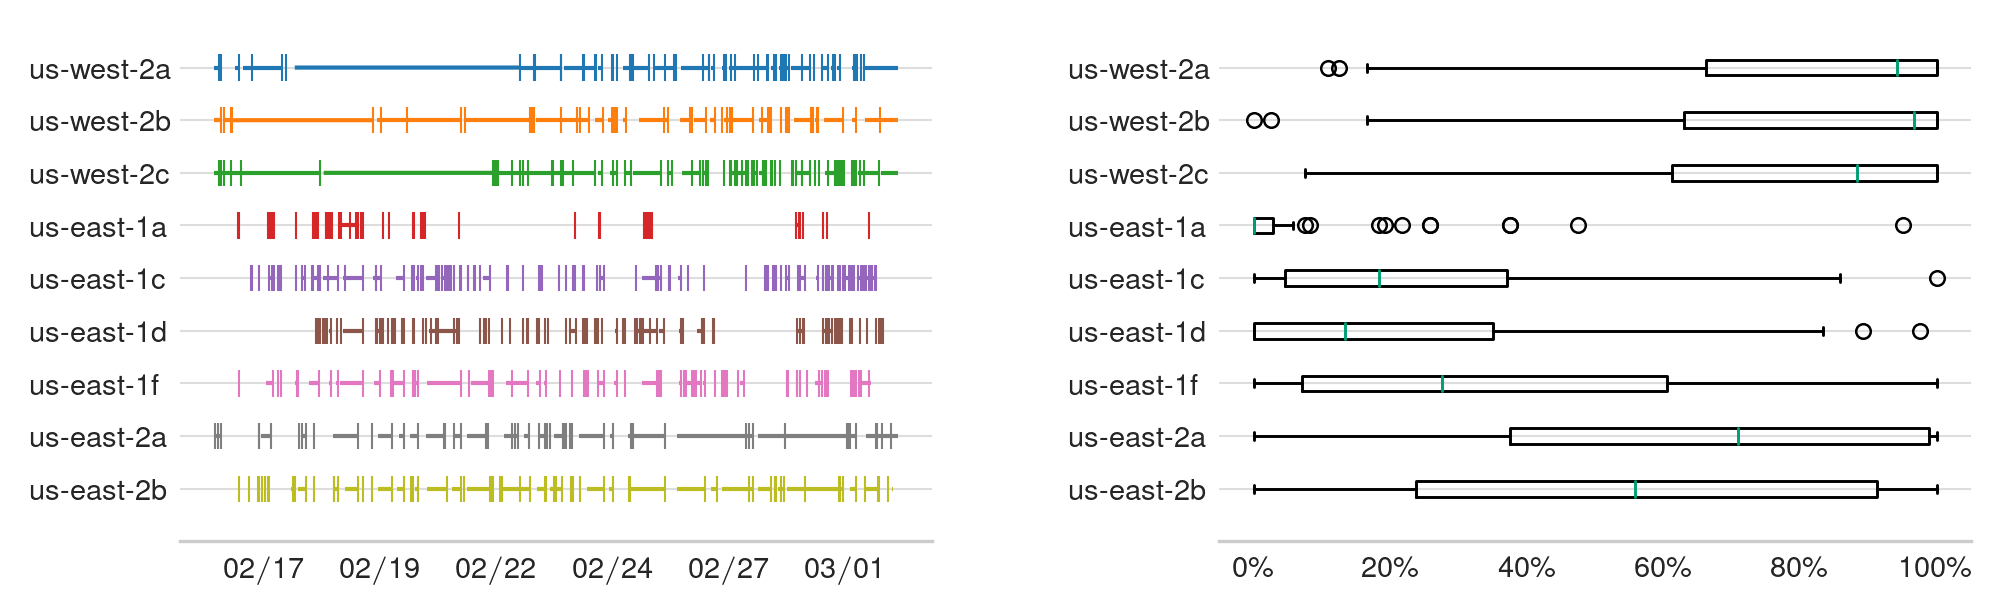

In [18]:




def get_avail(datapath, ratio=1):
    js = json.load(open(datapath, 'r'))
    data = js['data'][:int(len(js['data'])*ratio)]
    avail_list = [1-x for x in data]
    return avail_list


def get_spot_frac(avail_list, window_size):
    ret = []
    for i in range(0, len(avail_list), window_size):
        avail_list_sub = avail_list[i:i+window_size]
        ret.append(sum(avail_list_sub)/window_size*100)
    return ret




# fig = plt.figure(figsize=(fig_width, fig_height), dpi=200)

#fig, axes = plt.subplots(1, len(datalist), figsize=(fig_width, fig_height), constrained_layout=True, dpi=300)
fig, axes = plt.subplots(1, 2, figsize=(fig_width*2, fig_height), constrained_layout=True, dpi=300)




#######################

# datalist = ['us-west-2a_v100_1.json']
# datalist = ['us-east-1a_v100_1.json']

datalist = ['us-west-2a_v100_1.json',
            'us-west-2b_v100_1.json',
            'us-west-2c_v100_1.json',
            'us-east-1a_v100_1.json',
            'us-east-1c_v100_1.json',
            'us-east-1d_v100_1.json',
            'us-east-1f_v100_1.json',
            'us-east-2a_v100_1.json',
            'us-east-2b_v100_1.json',]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c',
          '#d62728', '#9467bd', '#8c564b',
          '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# datalist = ['us-east-1c_v100_1.json',
#             'us-east-1d_v100_1.json',
#             'us-west-2b_v100_1.json',
#             'us-west-2c_v100_1.json',]

ylim_scale = 1.08
overhead = 0.2
window_size = 50
# generate plots, 2 per row, 4 rows

# fig = plt.figure(figsize=(fig_width, fig_height), dpi=300)
ylim = 0.2 * len(datalist)
axes[0].set_ylim(0, ylim * ylim_scale)
for i, data in enumerate(datalist):
    print(data)
    
    datapath = '../../data/real/availability/2023-02-15/parsed/' + data
    plot_avail(datapath, axes[0], ratio=0.35, spot_unit=20, color=colors[i], center=ylim-0.2*i)

label_names = [data.split('_')[0] for data in datalist[::-1]]
y_pos = np.arange(0.2, 0.2*(len(label_names)+1), 0.2)
# axes.set_yticks(y_pos, labels=label_names, horizontalalignment='left', position=(-0.15,0))
axes[0].set_yticks(y_pos, labels=label_names, horizontalalignment='left', position=(-0.18,0))

# Format x-axis labels to show only month and day
date_format = DateFormatter("%m/%d")
axes[0].xaxis.set_major_formatter(date_format)
axes[0].xaxis.set_major_locator(MaxNLocator(nbins=7))



###################

# datalist = ['us-west-2a_v100_1.json']
# datalist = ['us-east-1a_v100_1.json']

# datalist = ['us-west-2a_v100_1.json',
#             # 'us-west-2b_v100_1.json',
#             # 'us-west-2c_v100_1.json',
#             # 'us-east-1a_v100_1.json',
#             # 'us-east-1c_v100_1.json',
#             'us-east-1d_v100_1.json',
#             # 'us-east-1f_v100_1.json',
#             # 'us-east-2a_v100_1.json',
#             'us-east-2b_v100_1.json',]
# reverse datalist
datalist = datalist[::-1]

# datalist = ['us-west-2b_v100_1.json', 'us-east-2a_v100_1.json']

colors = ['#1f77b4', '#ff7f0e', '#2ca02c',
          '#d62728', '#9467bd', '#8c564b',
          '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# def plot_ccdf(spot_life):
window_size = 120
# ratio=0.35
spot_unit=20
ratio=0.35


spot_life_all = []

for i, data in enumerate(datalist):
    spot_life_avg = []
    spot_life_median = []
    spot_avail_rate = []
    # fig = plt.figure(figsize=(fig_width, fig_height), dpi=200)
    datapath = '../../data/real/availability/2023-02-15/parsed/' + data
    avail_list = get_avail(datapath, ratio=ratio)
    
    # spot_life = get_spot_life(avail_list)
    # spot_life = [x/spot_unit for x in spot_life]
    # spot_life_all.append(spot_life)
    
    spot_frac = get_spot_frac(avail_list, window_size)
    spot_life_all.append(spot_frac)

    init_date_time = datetime.datetime(2023, 2, 15, 22, 0, 0)
    cur_time = []
    
# bp = axes.boxplot(spot_life_all, vert=False, widths=0.3, flierprops=dict(marker='.', markersize=5), showfliers=False)
bp = axes[1].boxplot(spot_life_all, vert=False, widths=0.3, flierprops=dict(marker='.', markersize=7))
# axes.set_xscale('log', base=2)
# Modify the outlier marker properties
for flier in bp['fliers']:
    flier.set_markeredgewidth(0.6)    # Set outlier marker edge width
    flier.set_markeredgecolor('black')
    #flier.set_markeredgecolor((0.2, 0.2, 0.2))  # Set outlier marker edge color to darker grey (RGB tuple)
linewidth = 0.7  # Set the desired linewidth
for element in ['boxes', 'whiskers', 'medians']:
    for item in bp[element]:
        item.set_linewidth(linewidth)
        
# Modify the linewidth of the caps
for cap in bp['caps']:
    cap.set_linewidth(linewidth)

label_names = [data.split('_')[0] for data in datalist]
y_pos = np.arange(1, (len(datalist)+1), 1)

# axes.set_yticks(y_pos, labels=label_names, horizontalalignment='left', position=(-0.15,0))
axes[1].set_yticks(y_pos, labels=label_names, horizontalalignment='left', position=(-0.18,0))
# axes[1].set_yticks(y_pos, labels=['']* len(label_names))
# set x label to be percentage
axes[1].xaxis.set_major_formatter(mtick.PercentFormatter())
axes[1].set_ylim(0, len(datalist) * ylim_scale)

fig.tight_layout(w_pad=5)
# plt.title('Spot fraction (12-hour window)')
# date_format = DateFormatter("%m/%d")
# plt.gca().xaxis.set_major_formatter(date_format)
# plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=8))
fig.show()
fig.savefig('figures/spot_fraction_merge_9zones.pdf', bbox_inches='tight', pad_inches=0)


In [19]:
def plot_avail_2(df, ax, center, color=colors[0], verlen=0.02):
    # Add a new column 'group' to store the group number for each continuous segment
    df['group'] = (df['avail'] == 0).cumsum()

    # Filter out rows with no availability
    available_df = df[df['avail'] == 1]

    # Get the unique group numbers
    groups = available_df['group'].unique()

    ymax = center + verlen
    ymin = center - verlen
    for i, group in enumerate(groups):
        group_data = available_df[available_df['group'] == group]
        group_data['avail'] = group_data['avail'].replace(1, center)

        #sns.lineplot(x='time', y='avail', data=group_data, ax=ax, color='blue', linewidth=2)
        ax.plot(group_data['time'],
                group_data['avail'],
                linestyle='-',
                color=color,
                linewidth=1,
                solid_capstyle='butt')

        # Add short vertical lines at the beginning and end of each segment
        start_time = group_data['time'].min()
        end_time = group_data['time'].max()

        # ax.vlines(x=start_time, ymin=ymin, ymax=ymax, colors='blue')
        if i != len(groups) - 1:
            ax.vlines(x=end_time,
                      ymin=ymin,
                      ymax=ymax,
                      linewidth=0.5,
                      color=color)


FileNotFoundError: [Errno 2] No such file or directory: '../availability/spot-data/backup/stats-p3.2xlarge-2.json'

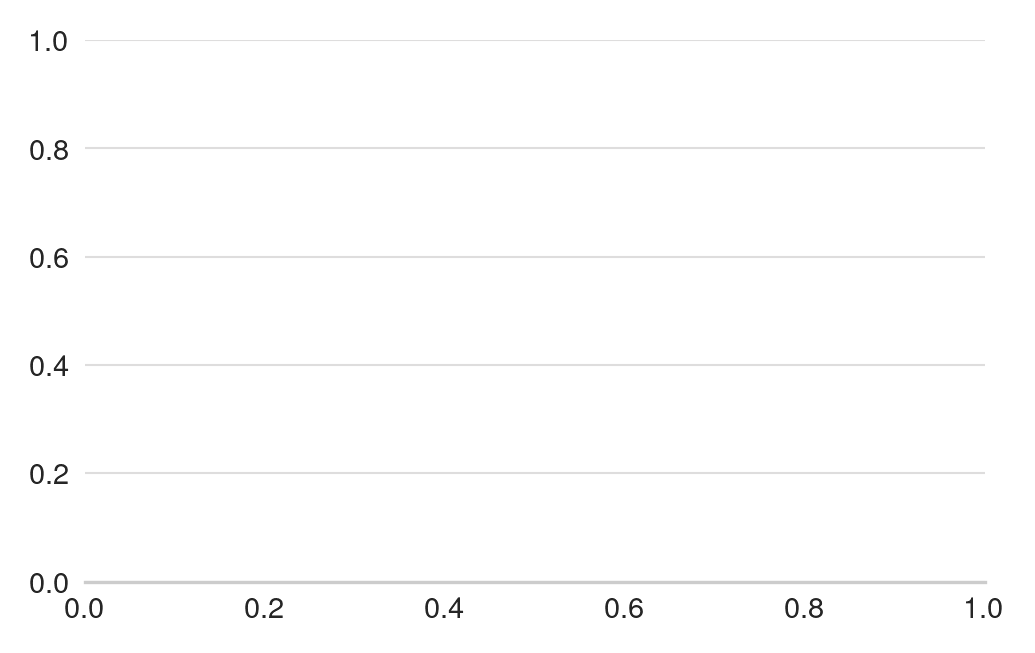

In [20]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pytz
import numpy as np

# plt.rcParams.update({'font.size': 18})
# sns.set_style('white')

PREEMPTION_TRACE_FILE = '../availability/spot-data/backup/stats-p3.2xlarge-2.json'
AVAILABILITY_TRACE_FILE = '../availability/traces/2022-11-28T22-23/us-west-2a_v100_1.txt'

def get_preemption_df():
    raw_events = []
    for line in open(PREEMPTION_TRACE_FILE, 'r'):
        raw_events.append(json.loads(line))

    def get_single_ins(events, zone):
        p_list = []
        cur_id = None
        seen_set = set()
        for event in events:
            if cur_id == None:
                possible_cur_id = None
                for ins_id in event[zone]['ins_ids']:
                    if ins_id not in seen_set:
                        possible_cur_id = ins_id
                        break
                if possible_cur_id is not None:
                    cur_id = possible_cur_id

            seen_set.update(event[zone]['ins_ids'])

            if cur_id is None or cur_id not in event[zone]['ins_ids']:
                cur_id = None
                p_list.append({'time': event['date'], 'avail': 0})
            else:
                p_list.append({'time': event['date'], 'avail': 1})
        return p_list

    preemption_events = get_single_ins(raw_events, 'us-west-2a')
    df = pd.DataFrame(preemption_events)
    df['time'] = pd.to_datetime(df['time'])
    df['time'] = df['time'].dt.tz_localize('US/Pacific')
    return df


def get_availability_df():
    f = open(AVAILABILITY_TRACE_FILE, 'r')
    availability_events = []
    p_list = []
    for line in f:
        line = line.split(',')
        availability_events.append({'time': line[1], 'avail': 1-int(line[2])})
        p_list.append(1-int(line[2]))

    df = pd.DataFrame(availability_events)
    df['time'] = pd.to_datetime(df['time'])
    return df





# plt.figure(figsize=(40, 6))

fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_height), constrained_layout=True, dpi=300)

center=0.5
color='lightcoral'
verlen=0.05


df_1 = get_preemption_df()
df_2 = get_availability_df()

common_tz = pytz.timezone('UTC')
df_1['time'] = df_1['time'].dt.tz_convert(common_tz)
df_2['time'] = df_2['time'].dt.tz_convert(common_tz)


plot_avail_2(df_1, ax, center=0.2)
plot_avail_2(df_2, ax, center=0.4)

ax.set_ylim([0, 0.6])

time_xlim = df_1.iloc[0]['time']-pd.Timedelta(hours=1), df_1.iloc[-1]['time']+pd.Timedelta(hours=1)
ax.set_xlim(time_xlim)

date_format = DateFormatter("%m/%d")
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=7))
# fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20, 6))

# sns.lineplot(x='time', y='availability', data=df_1, ax=ax1, drawstyle='steps-pre')
# sns.lineplot(x='time', y='availability', data=df_2, ax=ax2, drawstyle='steps-pre')
# plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=12, integer=True))


# time_xlim = df_1.iloc[0]['time']-pd.Timedelta(hours=1), df_1.iloc[-1]['time']+pd.Timedelta(hours=1)
# ax1.set_xlim(time_xlim)
# ax2.set_xlim(time_xlim)

# ax1.set_title('Real Preemption')
# ax2.set_title('Availability')

# ax1.set_yticks([0, 1])
# ax2.set_yticks([0, 1])

# plt.tight_layout()
# plt.show()

/tmp/ipykernel_7478/4176323655.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['avail'] = group_data['avail'].replace(1, center)
/tmp/ipykernel_7478/4176323655.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['avail'] = group_data['avail'].replace(1, center)


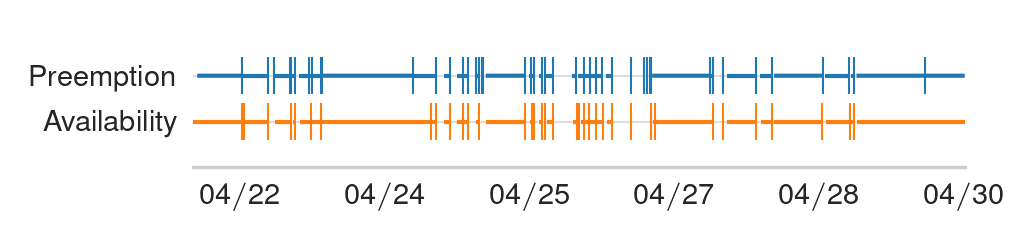

In [ ]:


# datalist = ['us-west-2a_v100_1.json']
# datalist = ['us-east-1a_v100_1.json']

datalist = ['us-west-2a_v100_1.json',
            'us-west-2b_v100_1.json']

colors = ['#1f77b4', '#ff7f0e', '#2ca02c',
          '#d62728', '#9467bd', '#8c564b',
          '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

def get_avail_df(filename, zone):
    raw_events = []
    for line in open(filename, 'r'):
        raw_events.append(json.loads(line))

    preemption_events = []
    for event in raw_events:
        preemption_events.append({'time': event['date'], 'avail': event[zone]['pool_size']})

    df = pd.DataFrame(preemption_events)
    df['time'] = pd.to_datetime(df['time'])
    return df

def get_preemption_df(filename, zone):
    raw_events = []
    for line in open(filename, 'r'):
        raw_events.append(json.loads(line))

    def get_single_ins(events, zone):
        p_list = []
        cur_id = None
        seen_set = set()
        for event in events:
            if cur_id == None:
                possible_cur_id = None
                for ins_id in event[zone]['ins_ids']:
                    if ins_id not in seen_set:
                        possible_cur_id = ins_id
                        break
                if possible_cur_id is not None:
                    cur_id = possible_cur_id

            seen_set.update(event[zone]['ins_ids'])

            if cur_id is None or cur_id not in event[zone]['ins_ids']:
                cur_id = None
                p_list.append({'time': event['date'], 'avail': 0})
            else:
                p_list.append({'time': event['date'], 'avail': 1})
        return p_list

    preemption_events = get_single_ins(raw_events, zone)
    df = pd.DataFrame(preemption_events)
    df['time'] = pd.to_datetime(df['time'])
    # df['time'] = df['time'].dt.tz_localize('US/Pacific')
    return df

def get_preemption_df_new(filename, zone):
    raw_events = []
    for line in open(filename, 'r'):
        raw_events.append(json.loads(line))

    def get_single_ins(events, zone):
        p_list = []
        for event in events:
            
            for ins in event['instances']:
                if ins['zone'] == zone:
                    if len(ins['ins_ids']) == 0:
                        p_list.append({'time': event['date'], 'avail': 0})
                    else:
                        p_list.append({'time': event['date'], 'avail': 1})
        return p_list

    preemption_events = get_single_ins(raw_events, zone)
    df = pd.DataFrame(preemption_events)
    df['time'] = pd.to_datetime(df['time'])
    # df['time'] = df['time'].dt.tz_localize('US/Pacific')
    return df

zone_tuple = ('us-west-2a', 'us-west-2b')
#zone_tuple = ('us-west-2c', 'us-west-2c')
#zone_tuple = ('us-east-1f', 'us-east-1f')
#zone_tuple = ('us-east-1a', 'us-east-1c')

df_avail = get_avail_df('../availability/stats-p3.2xlarge-1-2023-04-03T14:38:53.json', zone_tuple[0])
# df_preempt = get_preemption_df('../scripts/availability/real-stats-p3.2xlarge-1-2023-04-17T11:31:38.json', zone)
df_preempt = get_preemption_df_new('../availability/avail-stats-aws-2023-04-22T01:01:58.json', zone_tuple[1])

# avail-stats-aws-2023-04-22T01:01:58.json

fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_height/3), constrained_layout=True, dpi=300)

center=0.5
color='lightcoral'
verlen=0.02
plot_avail_2(df_preempt, ax, center=0.1, color=colors[0])
plot_avail_2(df_avail, ax, center=0.05, color=colors[1])

#ax.set_ylim([0, 0.3])


end_date = datetime.datetime(2023, 4, 30, 0, 0, 0)
# time_xlim = df_preempt.iloc[0]['time']-pd.Timedelta(hours=1), df_preempt.iloc[-1]['time']+pd.Timedelta(hours=1)
time_xlim = df_preempt.iloc[0]['time']-pd.Timedelta(hours=1), end_date
ax.set_xlim(time_xlim)
# ax.set_xlabel('Date')
#label_names = ['Availability', 'Preemption']
# axes.set_yticks(y_pos, labels=label_names, horizontalalignment='left', position=(-0.15,0))
#ax.set_yticks([0.1, 0.2], labels=label_names)
ax.set_yticks([0.05, 0.1], labels=['Availability', 'Preemption'])
ax.set_ylim([0, 0.15])

# ax.legend(['Availability', 'Preemption'])
# leg = ax.get_legend()
# leg.legend_handles[0].set_color(colors[0])
# leg.legend_handles[1].set_color(colors[1])
# leg.legend_handles[0].set_linewidth(1)
# leg.legend_handles[1].set_linewidth(1)
date_format = DateFormatter("%m/%d")
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=7))
# overhead = 0.2
# window_size = 50
# # generate plots, 2 per row, 4 rows

# fig, axes = plt.subplots(1, 1, figsize=(fig_width, fig_height), constrained_layout=True, dpi=300)
# # fig = plt.figure(figsize=(fig_width, fig_height), dpi=300)

# for i, data in enumerate(datalist):
#     print(data)
    
#     axes.set_ylim(0, 2)
#     datapath = '../scripts/availability/zh-data/real/availability/2023-02-15/parsed/' + data
#     plot_avail(datapath, axes, ratio=0.35, spot_unit=20, color=colors[i], center=1.8-0.2*i)

# label_names = [data.split('_')[0] for data in datalist[::-1]]
# y_pos = np.arange(0.2, 0.2*(len(datalist)+1), 0.2)
# # axes.set_yticks(y_pos, labels=label_names, horizontalalignment='left', position=(-0.15,0))
# axes.set_yticks(y_pos, labels=label_names, horizontalalignment='left', position=(-0.18,0))

# # Format x-axis labels to show only month and day
# date_format = DateFormatter("%m/%d")
# plt.gca().xaxis.set_major_formatter(date_format)
# plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=7))

# # compact)
# #fig.suptitle(f'Spot availability over two weeks')
# fig.show()
fig.savefig('figures/preemption_approx.pdf', bbox_inches='tight', pad_inches=0)

In [ ]:
df_avail

,time,avail
0,0 days 00:00:00,1
1,0 days 00:03:17,1
2,0 days 00:06:33,1
3,0 days 00:09:49,1
4,0 days 00:13:04,1
...,...,...
11943,27 days 03:02:00,1
11944,27 days 03:05:16,1
11945,27 days 03:08:33,1
11946,27 days 03:11:49,1


In [ ]:



filepath = './availability/zh-data/real/availability/2023-02-15/raw/stats-p3.2xlarge-1-2023-02-15T22:05:16.json'
event_all = []
for line in open(filepath, 'r'):
    js = json.loads(line)
    
    for zone in zones:
        event = {}
        event['date'] = js['date']
        event['zone'] = zone
        event['avail'] = js[zone]['pool_size']
        event['price'] = float(js[zone]['price'])
        
        event_all.append(event)
        

df = pd.DataFrame(event_all)
# to datetime
df['date'] = pd.to_datetime(df['date'])

zone = list(zones)[0]
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_height), constrained_layout=True, dpi=300)

ratios = []
for zone in zones:
    
    df_zone = df[df['zone'] == zone]
    # df_zone['price'] = df_zone['price']/3.06
    
    length = len(df_zone)
    sublength = int(length/12)
    for i in range(0, length, sublength):
        df_zone_sub = df_zone.iloc[i:i+sublength, :]
        # ratio of max price / avg price
        ratio = (df_zone_sub['price'].max()-df_zone_sub['price'].min())/df_zone_sub['price'].min()
        ratios.append(ratio)
        # print(ratio)
        
    print('=====')
    
    # df_zone = df_zone.iloc[::1000, :].reset_index(drop=True)
    # ax.plot(df_zone['date'], df_zone['price'], label=zone)
    # date_format = DateFormatter("%m/%d")
    # plt.gca().xaxis.set_major_formatter(date_format)
    # plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=7))

ax.set_ylim(0, 1)
fig.show()